
## Regréssion Linéaire Simple
---

### Dataset

On possède un jeu de données où : 
> ${y}$ - **target** (notre variable cible) <br>
> ${x}$ - **features** (nos variables d'entrées) où ${p}$ est le nombre de variables <br>
> ${n}$ - Nombre d'**individus** <br>


Pour un échantillon de 100 **individus** et 1 **variable** on peut afficher le graphique suivant : 

In [8]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_regression

np.random.seed(0)
x, y = make_regression(n_samples=100, n_features=1, noise=10)
y = y.reshape((100,1))

plt.scatter(x, y);

### Modèle

Dans le modèle de **régression linéaire**, on veut ajuster nos données par une droite. La droite d'ajustement est de la forme :

$$y = {\beta}_{\text{0}} + {\beta}_{\text{1}} X_{1} +  {\epsilon}$$

Cette droite ne sera pas parfaite car il existe des erreurs de prédictions. Ces erreurs  sont stockés dans le termes ${\epsilon}$.

$$\hat{y} = {\beta}_{\text{0}} + {\beta}_{\text{1}} X_{1}$$

On peut donc évaluer cette erreur et ensuite la minimiser.

$$\epsilon_i = y_i - \hat{y}_i$$

Le calcul des prédictions sous la forme matricielle : $ \hat{Y} = X\beta $


$$ \begin{bmatrix} \hat{y}_1 \\ \vdots \\ \hat{y}_n \end{bmatrix}  \hspace{0.2cm}  =  \hspace{0.2cm} \begin{bmatrix} x_1 & \cdots & 1 \\ \vdots & \ddots & \vdots\\ x_n & \cdots & 1 \end{bmatrix}  \hspace{0.8cm}
\begin{bmatrix} \beta_0 \\ \cdots \\ \beta_p \end{bmatrix}
$$

$$(n,1) \hspace{1.2cm} (n, p+1) \hspace{1.2cm} (p+1, 1)$$

On ajoute un vecteur colonne appelé le biais à la fin de la matrice $X$ afin de pouvoir les multiplier entre elles :

$$\begin{bmatrix} 1 \\ \vdots \\ 1 \end{bmatrix}$$

In [9]:
def prediction(X, beta):
    return X.dot(beta)

On peut essayer d'initialiser deux paramètre $\beta$ aléatoire afin de voir l'ajustement à cette courbe.

In [10]:
np.random.seed(0)
beta = np.random.randn(2, 1)
print("B0 = {b1} \nB1 = {b2}".format(b1 = beta[0], b2 = beta[1]))

B0 = [1.76405235] 
B1 = [0.40015721]


On ajoute la colonne de biais composé de `1` à notre matrice $X$ afin de pouvoir multiplier $X$ et le vecteur $\beta$ : 

In [11]:
biais = np.ones((x.shape))
X = np.hstack((x, biais))

Cette première regression avec les paramètres choisit aléatoirement n'ajuste pas bien les données.

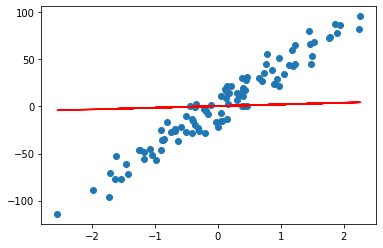

In [5]:
plt.scatter(x, y)
plt.plot(x, prediction(X, beta), c='r');

### La Loss

L'objectif de la **régression linéaire** est de minimiser l'erreur totale. Il s'agit de la moyenne des écarts au carré entre la valeur $Y$ et sa prédiction $\hat{Y}$. 

**Cette différence est mise au carré afin de l'harmoniser entre les signes positifs et négatifs et de pénaliser davantage les outliers*. 

On somme ensuite l'erreur pour tous les individus, et on divise par le nombre d'individus pour en faire la **moyenne des erreurs**, également appelé la **Mean Squared Error (MSE)** ou la **Loss** : 


$$ Loss = \frac{1}{2 n} \sum ( y_i - {\beta}_{\text{0}} + {\beta}_{\text{1}}  X_i)^2 $$


Sous format matriciel : 

$$ Loss = \frac{1}{2 n} \sum ( Y - X \beta)^2 $$

*On multiplie par $\frac12$ afin de faciliter les calculs par la suite.*

In [12]:
def loss(X, y, beta):
    n = len(y)
    return 1/(2*n) * np.sum((prediction(X, beta) - y)**2)

La **Loss** de notre modèle précédent est donc très élevée. Ces paramètres $\beta$ ne permettent donc pas de minimiser notre erreur totale.

In [7]:
print(loss(X,y,beta))

905.6306841935502


### Descente de Gradient 

[Comment fonctionne la Descente de Gradient ?](./DescentedeGradient.ipynb)

Une des méthodes pour résoudre cette équation, est l'utilisation de l'algorithme de la **Descente de Gradient** qui fonctionne par itération. Il s'agit de la **solution numérique**.

Cette méthode consiste à chercher la pente vers la solution la plus importante, à chaque itération.

Afin d'effectuer une **Descente de Gradient**, il faut d'abord calculer le **Gradient** de la fonction coût (Loss). Ensuite, il convient d'initialiser une valeur de la fonction (aléatoire) pour commencer la descente, et un **learning rate** qui définit le pas.

Pour calculer le **Gradient**, il faut tout d'abord calculer les dérivés partielles de la fonction. La Loss est de forme quadratique et contient une fonction, donc il faut utiliser la dérivé d'une composé de fonction : 

$$ (g \circ f)' = f' \circ g'(f)$$

Les dérivées à utiliser pour la **Loss** sont :

$$ Loss = \frac{1}{2 n} \sum ( y_i - \beta_{\text{0}} + \beta_{\text{1}}  X_i)^2 $$


- $f = y_i - \beta_{\text{0}} + \beta_{\text{1}}  X_i $ 
 
- $g(f) = f^2$

<br>

Par exemple, pour $\beta_1$ : 

$$f' = x$$  $$g' = 2f$$

$$\frac 1 {2n} \sum 2 x( y_i - \beta_{\text{0}} + \beta_{\text{1}}  X_i) $$

<br>

$$\frac 1 {n} \sum x( y_i - \beta_{\text{0}} + \beta_{\text{1}}  X_i) $$

Le calcul du **Gradient** de la Loss pour chaque coefficient est le suivant : 

$$
\frac{\partial{Loss}} {\partial{\beta}_1} = \frac 1n \sum_i {x_i} ({x_i} \cdot {\beta} - y_i)
$$


$$
\frac{\partial{Loss}} {\partial{\beta}_0} = \frac 1n \sum_i{1} \hspace{0.1cm} (x_i \cdot \beta - y_i)
$$

Pour éviter de calculer les Gradients de chaque paramètre un par un, on peut transformer ce vecteur de Gradient au format matriciel.

$$ \begin{bmatrix}
     \frac{\partial L}{\partial \beta_1}\\
     \frac{\partial L}{\partial \beta_0}\\
    \end{bmatrix}
=
   \begin{bmatrix}
     \frac 1n \sum_i {x_i} ({x_i} \cdot {\beta} - y_i) \\
     \frac 1n \sum_i{1} \hspace{0.1cm} (x_i \cdot \beta - y_i) \\
    \end{bmatrix} $$

Le **Gradient** de la Loss qui comprend tous les $\beta$ qui annulent la Loss : 

$$\frac{\partial Loss}{\partial \beta} = \frac{1}n  \hspace{0.1cm} X^T (X\beta - y) $$

$X^T$ permet de multiplier la matrice des Gradients pour chaque paramètre associé.

$$ X^T = \begin{bmatrix} {x}_1 && x_2 && \cdots && x_n \\ 1 && 1 && \cdots && 1 \end{bmatrix} $$

In [13]:
def gradient(X, y, beta):
    n = len(y)
    return 1/n * X.T.dot(prediction(X, beta) - y)

Ensuite on utilise la fonction de descente de gradient :

$$\beta_{t+1} = \beta_t - \eta \frac{\partial Loss }{\partial \beta}$$

Ici, $\eta$ est le **Learning rate**, il s'agit de la vitesse de convergence du Gradient. Si celui-ci est trop élevé, on va osciller autour de la solution. Si celui-ci est trop faible, on va mettre beaucoup d'itération avant d'atteindre la solution. 

In [9]:
def gradient_descent(X, y, beta, learning_rate, n_iterations):
    
    cost_history = []
    
    for i in range(0, n_iterations):
        
        beta = beta - learning_rate * gradient(X, y, beta)
        cost_history.append(loss(X, y, beta))
        
    return beta, cost_history

On peut maintenant essayer de faire une descente de Gradient en choisissant un Learning rate et un nombre d'itération.

In [10]:
n_iterations = 100
learning_rate = 0.5

beta_grad, hist = gradient_descent(X, y, beta, learning_rate, n_iterations)

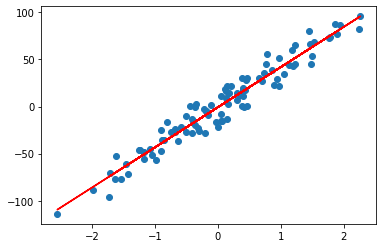

In [11]:
pred = prediction(X, beta_grad)
plt.scatter(x, y)
plt.plot(x, pred, c='r');

Pour vérifier si notre algorithme de **Descente de Gradient** a bien convergé, on observe l'évolution de la Loss à travers les itérations. On est sensé obtenir une courbe qui diminue a chaque itération jusqu'a stagner a un niveau minimal (proche de zéro). 

Si la courbe ne suit pas ce motif : 

- Le pas du **learning_rate** est peut-etre trop élevé, il faut prendre un pas plus faible. La fonction rebondie et ne converge jamais.

<img src="src/learning_rate_choice 3.png" width =200 >

- Le **nombre d'itération** n'est pas suffisant, l'algorithme n'a pas eu le temps de converger. De manière générale, ceci est dû à un pas trop faible.

<img src="src/learning_rate_choice.png" width =200 >

#### Loss pour chaque itération

Pour le modèle précédent on a stocker la **Loss** à chaque itération du Gradient. On peut voir que celui-ci se stabilise au bout de 10 itérations pour un $\eta$ de 0.5.

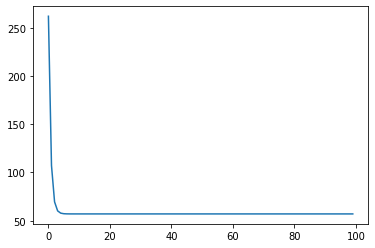

In [12]:
plt.plot(range(0, n_iterations), hist);

[Autre méthodes de Descente de Gradient](SD_Batch_Gradient.ipynb)

### Moindre Carrés Ordinaires (MCO)

Une méthode pour minimiser l'erreur de notre modèle est d'utiliser les **Moindres Carrés Ordinaires**. Pour cela on cherche :

$$\frac{\partial{Loss}} {\partial{\beta}} = 0$$

La solution **analytique** est :

$$
{\beta}_{\text{MCO}} = ({X}^T{X})^{-1} {X}^T {y}
$$



In [98]:
def mco(X,Y):
    return (np.linalg.inv((X.T).dot(X))).dot(X.T.dot(Y))

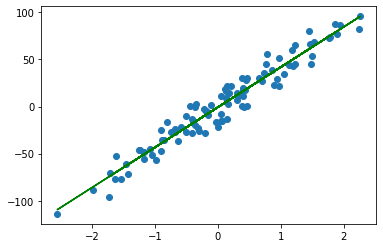

In [14]:
beta_mco = mco(X,y)
plt.scatter(x, y)
plt.plot(x, prediction(X, beta_mco), c='g');

#### À partir de la dérivé : 


$$ \frac{\partial Loss}{\partial \beta} = \frac{1}n  \hspace{0.1cm} X^T (X\beta - Y)$$

---

 
$$\frac{1}n  \hspace{0.1cm} X^T (X\beta - Y)= 0 $$ 

On multiplie par $n$ de chaque côté :

$$ X^T (X\beta - Y)= 0 $$ 

On distribue $X^T$ : 

$$ X^T X\beta - X^T Y = 0 $$ 

$$ X^T X\beta  = X^T Y $$ 

Il faut inverser $X^TX$ (cas où la matrice est de plein rang) :

$$ (X^TX)^{-1} X^T X\beta  = (X^TX)^{-1} X^T Y $$ 

$$ I \hspace{0.1cm} \beta  = (X^TX)^{-1} X^T Y $$ 

$$ \beta  = (X^TX)^{-1} X^T Y $$ 

#### À partir de l'erreur  : 

$$ \epsilon^2 = (Y-X\beta)^2$$

$$ (Y-X\beta)^T \hspace{0.2cm} (Y-X\beta)$$

$$ Y^T Y - Y^T X\beta - (X{\beta})^T Y + (X\beta)^TX\beta$$

$$ Y^T Y - Y^T X{\beta} - {\beta}^T X^T Y + {\beta}^T X^T X{\beta}$$

Ici : $Y^T X{\beta} =  {\beta}^T X^T Y$ car il s'agit d'un scalaire (1,1).

$$ Y^T Y -  2 {\beta}^T X^T Y + {\beta}^T X^T X{\beta}$$

On dérive chaque terme : 

$$ \frac{\partial \hspace{0.1cm} Y^TY}{\partial \beta} = 0$$

$$ \frac{\partial \hspace{0.1cm} - 2 \hspace{0.1cm} {\beta}^T X^T Y}{\partial \beta} = - 2 \hspace{0.1cm} X^T Y$$

$$ \frac{\partial \hspace{0.1cm} {\beta}^T X^T X{\beta}}{\partial \beta} = 2 \hspace{0.1cm} X^T X \beta$$

Si on assemble les termes : 

$$ - 2 \hspace{0.1cm} X^T Y + 2 \hspace{0.1cm} X^T X \beta = 0 $$ 

$$  - 2 \hspace{0.1cm} X^T Y = - 2 \hspace{0.1cm} X^T X \beta$$

On divise par deux de chaque côté :

$$ \hspace{0.1cm} X^T Y = \hspace{0.1cm} X^T X \beta$$

$$ (X^TX)^{-1} X^T X\beta  = (X^TX)^{-1} X^T Y $$ 

$$ I \hspace{0.1cm} \beta  = (X^TX)^{-1} X^T Y $$ 

$$ \beta  = (X^TX)^{-1} X^T Y $$ 

## Régression Linéaire Multiple 

---

On ajoute maintenant une nouvelle variable à notre modèle : 

In [126]:
np.random.seed(0)
x, y = make_regression(n_samples=100, n_features=2, noise=10)
y = y.reshape((100,1))

On peut afficher nos données sur trois axes : 

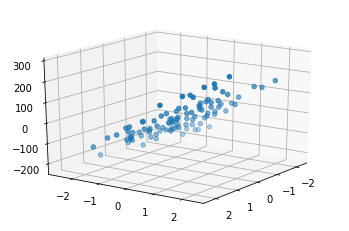

In [67]:
from mpl_toolkits.mplot3d import Axes3D

ax = plt.axes(projection="3d")
ax.scatter(x[:,0],x[:,1],y)
ax.view_init(20,35);
plt.show()

On initialise un nouveau vecteur $\beta$ composé de 3 paramètres.

In [17]:
np.random.seed(0)
beta = np.random.randn(3, 1)

print(f"beta0 : {beta[0]}\n\
beta1 : {beta[1]}\n\
beta2 : {beta[2]}\n")

beta0 : [1.76405235]
beta1 : [0.40015721]
beta2 : [0.97873798]



On y rajoute une colonne biais afin de pouvoir multiplier les matrices.

In [18]:
biais = np.ones((x.shape[0],1))
X = np.hstack((x, biais))

On calcule les paramètres de la régression par la descente de gradient et on observe si l'algortihme à bien convergé.

In [19]:
new_beta, loss = gradient_descent(X, y , beta, 0.1, 100)

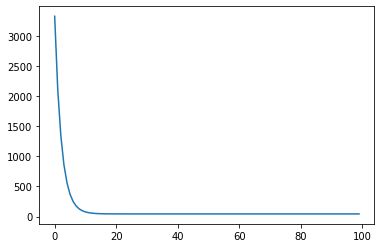

In [20]:
plt.plot(range(len(loss)), loss);

Comparaison des paramètres de la **solution analytique** (MCO) et de la **solution numérique** (GD) : 

In [68]:
print(f"Paramètre GD :\n {new_beta} \n")
print(f"Paramètre MCO :\n {mco(X,y)}")

Paramètre GD :
 [[28.67438161]
 [97.29828686]
 [-0.51411117]] 

Paramètre MCO :
 [[28.67438168]
 [97.29828688]
 [-0.51411125]]


On peut calculer le $R^2$ qui mesure le rapport entre la variance expliquée par la régression (SSE) sur la variance totale (SST). Il s'agit de la performance de notre modèle au regard des prédictions.


$$R^2 = 1 - \frac{\sum(y_i - \hat{y_i})^2} {\sum(y_i - \bar{y_i})^2}$$  

In [89]:
SCR = sum((y - prediction(X, new_beta))**2)
SCT = sum((y - np.mean(y))**2)

np.round(1 - (SCR / SCT), 3)[0]

0.992

### Régression avec Statsmodel 

*Attention : on utilise les données avec la colonne de biais `1` pour afficher la constante dans la fenêtre de sortie.*

In [91]:
import statsmodels.api as sm

model = sm.OLS(y,X)
model.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.992
Model:                            OLS   Adj. R-squared:                  0.991
Method:                 Least Squares   F-statistic:                     5773.
Date:                Wed, 01 Jan 2020   Prob (F-statistic):          1.43e-101
Time:                        10:11:26   Log-Likelihood:                -366.34
No. Observations:                 100   AIC:                             738.7
Df Residuals:                      97   BIC:                             746.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            28.6744      0.943     30.396      0.000      26.802      30.547
x2            97.2983      0.938    103.763      0.000      95.437      99.159
const         -0.5141      0.967     -0.531      0.596      -2.434       1.406
==============================================================================
Omnibus:                        1.222   Durbin-Watson:                   2.016
Prob(Omnibus):                  0.543   Jarque-Bera (JB):                0.715
Skew:                          -0.127   Prob(JB):                        0.699
Kurtosis:                       3.327   Cond. No.                         1.16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

On peut lire la p-value comme la probabilité de trouver une valeur de test supérieure ou égale à la valeur qu'on à trouver pour notre échantillonm

### Régression avec Sckit-learn 

On doit importer la fonction `régression linéaire` depuis le package `linear_model`

In [93]:
from sklearn.linear_model import LinearRegression

La Classe `LinearRegression` peut être construite sans argument. On peut ensuite utiliser les données sans la colonne de biais pour lancer l'algorithme.

- Classe `LinearRegression()` : permet d'instancer la classe afin de créer un objet pour effectuer la régression.
- Méthode `fit(X,y)` : permet d'entraîner les données afin de déterminer les paramètres de la régression.
- Méthode : `predict(X)` : utilise des données pour prédire de nouvelles données à partir des coefficients estimés.
- Méthode : `score(X,y)` : calcule la performance du modèle avec comme mesure le $R^2$

In [127]:
model = LinearRegression()
model.fit(x,y)
model.score(x,y)

0.9916687143305171


- L'attribut `intercept_` permet d'afficher la constante du modèle. 
- L'attribut `coef_` permet d'afficher les coefficients du modèle.

In [130]:
print(model.intercept_)
print(model.coef_)

[-0.51411125]
[[28.67438168 97.29828688]]


On peut conserver dans un objet le vecteur des prédictions selon des données entrées en paramètres : 

In [98]:
prediction = model.predict(X)

## Régularisation 
---

### Overfiting 

L'overfiting consiste pour un modèle de bien apprendre sur les données d'apprentissage mais ne pas réussir à bien prédire à l'arrivée de nouvelles données. Ce modèle aura appris trop de complexités (bruit aléatoire) sur l'échantillons d'entraînement et ne sera pas en mesure de généraliser sur de nouvelles données. Plusieurs facteurs engendre l'overfitting : 

- **La complexité du modèle** : lorsque qu'un modèle possède beaucoup de coefficients, ce dernier a beaucoup plus de chance d'expliquer trop de détails liés au bruit de variabilité. Ceci fait que notre population à un moment données, présente une corrélation hasardeuse qui ne fonctionnerait pas sur un autre échantillon. La statistique de Student donnerait un p-value inférieur à 5% alors que cette corrélation n'est que le fruit du hasard. Ceci s'explique par le fait que la distribution des pvalues est uniformes. Donc à partir de 20 variables il y a une variable corrélée significativement (seuil de 5%) avec notre variable de sortie.
- **La multicolinéarité** : certaines variables d’entrés peuvent être liées ce qui engendre de la redondance d'informations et peut conduire à modifier les estimateurs.
- **La haute dimensionnalité** : si un modèle possède trop de coefficients, comparé à son nombre d'individus, il aura tendance à apprendre beaucoup sur ce petit échantillon d'individus.


### Régression Ridge : pénalisation $L_2$

La régression **Ridge** ajoute un paramètre de pénalité (égale à la distance euclidienne des paramètres) afin de forcer les coefficients à être le plus petit possible, sans les réduire à zéros :

$$Ridge = \sum(y_i - X_i \beta)^2 + \lambda \vert\vert \, \beta \, \vert\vert_2$$

Pour le calculer :

$$\beta = (X^TX + \lambda I)^{-1}X^Ty$$

In [87]:
def ridge(X,y, penalty):
    return np.linalg.inv(X.T.dot(X) + penalty * np.identity(X.shape[1])).dot(X.T.dot(y))

In [103]:
ridge(X,y,penalty=0.1)

array([[42.57746844],
       [-0.81086131]])

In [93]:
def ridge_gradient_descent(X, y, beta, learning_rate, n_iterations, penalty=0.0):
    
    cost_history = []
    n = len(y)
    for i in range(0, n_iterations):
        
        beta = beta - learning_rate * (gradient(X, y, beta) + (penalty / n * beta))
        cost_history.append(loss(X, y, beta)) 
        
    return beta, cost_history

In [91]:
coef, loss_ridge = ridge_gradient_descent(X,y,beta,learning_rate=0.01, 
                                          n_iterations=1000, penalty=10)

### Régression Lasso : pénalisation $L_1$

La régression Lasso pénalise les coefficients par la norme l1 (distance de manhattan). Cette contrainte a pour conséquence d'introduire du biais. Par cette régularisation, les coefficients les moins significatifs sont réduits vers zéro.

In [104]:
def lasso_gradient_descent(X, y, beta, learning_rate, n_iterations, penalty=0.0):
    
    cost_history = []
    n = len(y)
    for i in range(0, n_iterations):
        
        beta = beta - learning_rate * (gradient(X, y, beta) + (penalty / n * sum(abs(beta))))
        cost_history.append(loss(X, y, beta)) 
        
    return beta, cost_history

In [116]:
lasso_coef, lasso_loss = lasso_gradient_descent(X,y,beta, learning_rate=0.01, n_iterations=1000, penalty=10)

In [117]:
lasso_coef

array([[38.59173785],
       [-4.92189097]])

In [114]:
from sklearn.linear_model import Lasso

lass = Lasso(alpha=10).fit(X,y)
lass.coef_, lass.intercept_

(array([32.77523069,  0.        ]), array([-0.22541978]))

**Attention** : Toutes les hypothèses de test concernant la régression s’écroulent si on ajoute ce terme de pénalités. 

Cette régularisation s'utilise dans le cas où on veut juste bien prédire (sans contraintes). Si jamais il y avait un problème de **multicolinéarité**, la pénalisation peut régler ce problème d’overfitting.

**Rasoir d’Ockham** : parmi les solutions on veut la plus simple. 